# Feature-based image alignment using OpenCV  

In [2]:
import cv2
import numpy as np
import os
import json
from matplotlib import pyplot as plt

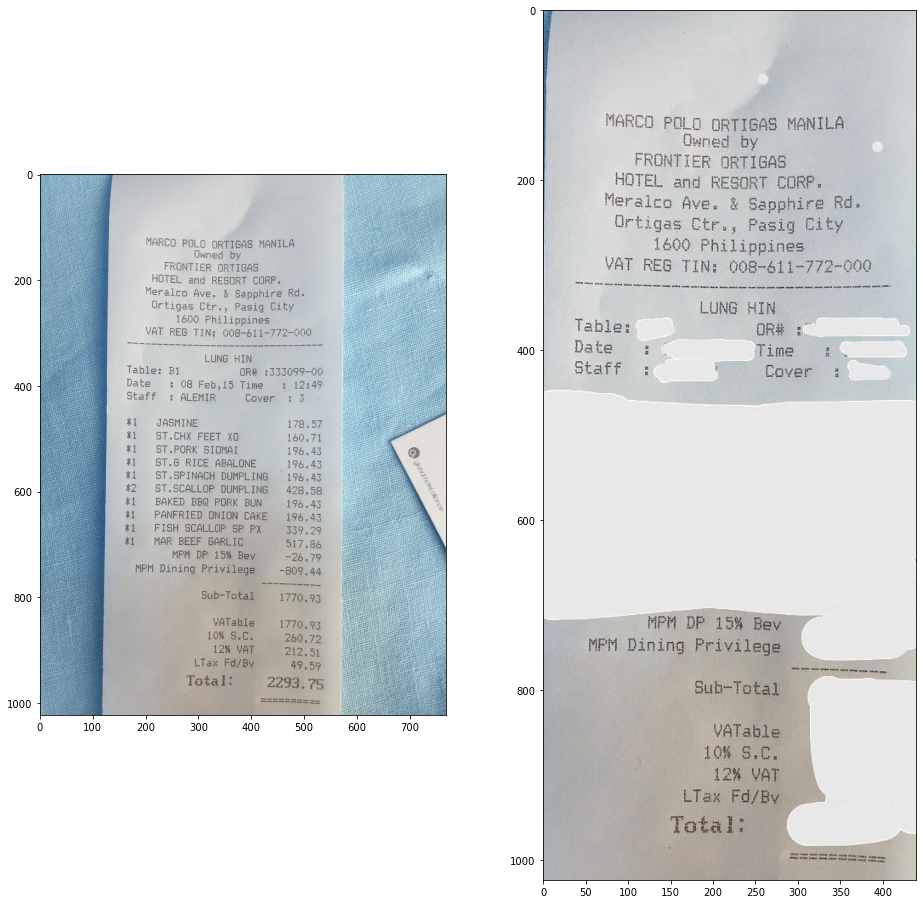

In [3]:

im1=cv2.imread('images/bill.jpg' , cv2.IMREAD_COLOR)
im2=cv2.imread('images/query.jpeg' , cv2.IMREAD_COLOR)

fig, ax = plt.subplots(1,2,figsize=(16,16))
ax[0].imshow(im1)
ax[1].imshow(im2)



# Convert images to grayscale
im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
 

MAX_FEATURES = 5000
    
# Detect ORB features and compute descriptors.
orb = cv2.ORB_create(MAX_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

GOOD_MATCH_PERCENT = 0.15

# Sort matches by score
matches = list(matches)
matches.sort(key=lambda x: x.distance, reverse=False)
 
  # Remove not so good matches
numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:numGoodMatches]

In [4]:
# Draw top matches
imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
cv2.imwrite("matches.jpg", imMatches)

True

In [5]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

In [6]:
for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

In [7]:
# Find homography
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
 
  # Use homography
height, width, channels = im2.shape
im1Reg = cv2.warpPerspective(im1, h, (width, height))

In [8]:
outFilename = "aligned.jpg"
print("Saving aligned image : ", outFilename);
cv2.imwrite(outFilename, im1Reg)

Saving aligned image :  aligned.jpg


True

In [9]:
# Print estimated homography
print("Estimated homography : \n",  h)

Estimated homography : 
 [[ 1.00105815e+00  2.02228892e-04 -1.27202601e+02]
 [ 1.73073255e-04  1.00010926e+00 -4.32559098e-02]
 [ 5.61434850e-07 -6.99529193e-08  1.00000000e+00]]


## Croped Aligned image

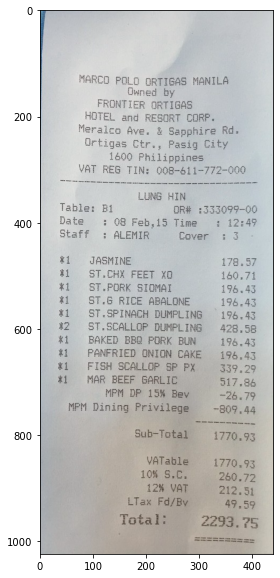

In [10]:
aligned_img=cv2.imread('aligned.jpg')
matches_img=cv2.imread('matches.jpg')
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(aligned_img)




## Matches Image

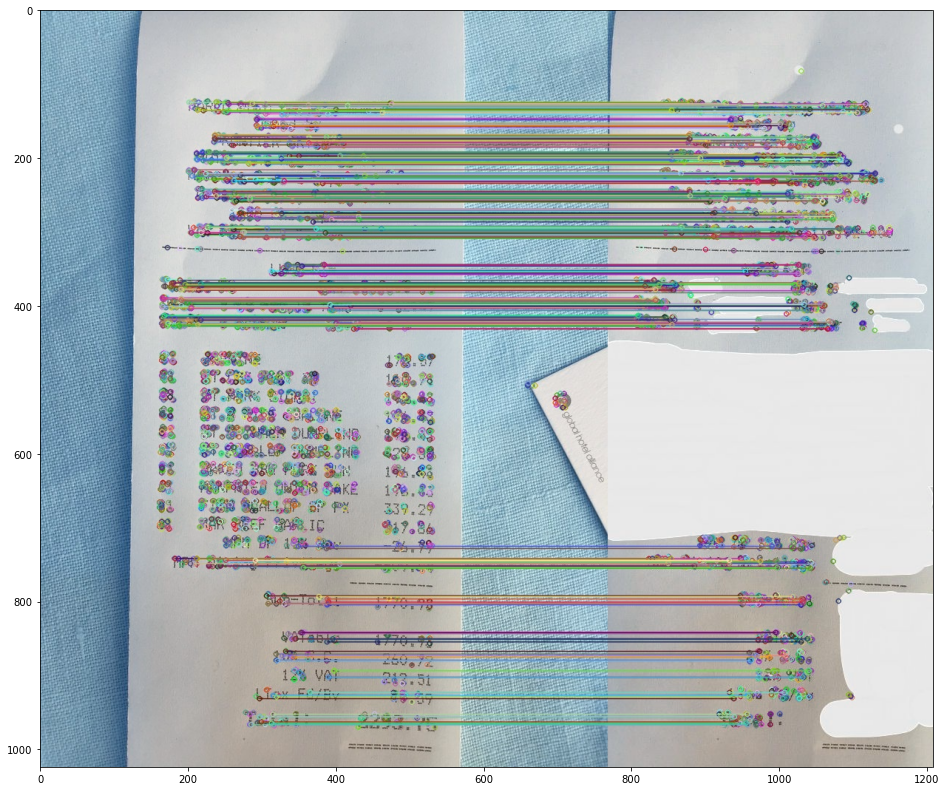

In [11]:
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(matches_img)

In [12]:
im2 = cv2.imread('images/query.jpeg')
h,w,c = im2.shape
print(h,w,c)

1024 440 3


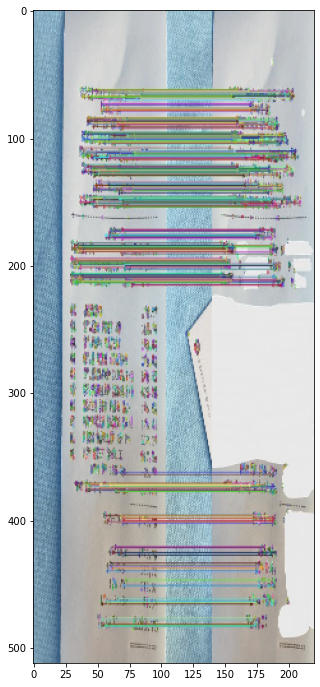

In [13]:
matches_img = cv2.resize(matches_img, (w // 2, h // 2))
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(matches_img)

In [14]:
good = matches[:int(len(matches)*(25/100))]
srcPoints = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
print(srcPoints)

[[[242.      193.     ]]

 [[400.      256.     ]]

 [[269.      298.     ]]

 [[331.      352.     ]]

 [[183.      394.     ]]

 [[381.      357.     ]]

 [[179.      414.     ]]

 [[437.18405 198.72002]]

 [[338.4116  134.36931]]

 [[345.      131.     ]]

 [[360.      275.     ]]

 [[173.      424.     ]]

 [[351.      271.     ]]

 [[238.      244.     ]]

 [[248.      194.     ]]

 [[392.      746.     ]]

 [[263.52002 259.2    ]]

 [[250.56001 292.32   ]]

 [[176.      375.     ]]

 [[400.      178.     ]]

 [[294.      270.     ]]

 [[392.      369.     ]]

 [[220.      224.     ]]

 [[236.      193.     ]]

 [[304.      245.     ]]

 [[205.      415.     ]]

 [[305.      140.     ]]

 [[354.      306.     ]]

 [[288.      201.     ]]

 [[196.      403.     ]]

 [[202.      403.     ]]

 [[396.      369.     ]]

 [[369.      354.     ]]

 [[315.      249.     ]]

 [[382.      197.     ]]

 [[246.24    302.40002]]

 [[269.      304.     ]]

 [[296.      220.     ]]

 [[388.     

In [15]:
 dstPoints = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
print(dstPoints)

[[[115.       193.      ]]

 [[273.       256.      ]]

 [[142.       298.      ]]

 [[204.       352.      ]]

 [[ 56.       394.      ]]

 [[254.       357.      ]]

 [[ 52.       414.      ]]

 [[311.04004  198.72002 ]]

 [[211.50725  134.36931 ]]

 [[218.       131.      ]]

 [[233.       275.      ]]

 [[ 46.       424.      ]]

 [[224.       271.      ]]

 [[111.       244.      ]]

 [[121.       194.      ]]

 [[265.       746.      ]]

 [[136.8      259.2     ]]

 [[123.840004 292.32    ]]

 [[ 49.       375.      ]]

 [[273.       178.      ]]

 [[167.       270.      ]]

 [[265.       369.      ]]

 [[ 93.       224.      ]]

 [[109.       193.      ]]

 [[177.       245.      ]]

 [[ 78.       415.      ]]

 [[178.       140.      ]]

 [[227.       306.      ]]

 [[161.       201.      ]]

 [[ 69.       403.      ]]

 [[ 75.       403.      ]]

 [[269.       369.      ]]

 [[242.       354.      ]]

 [[188.       249.      ]]

 [[255.       197.      ]]

 [[119.520004 302.40

In [16]:
M, _ = cv2.findHomography(srcPoints,dstPoints,cv2.RANSAC,5.0)
imgScan = cv2.warpPerspective(im1,M,(w,h))

imgShow = imgScan.copy()
imgMask = np.zeros_like(imgShow)



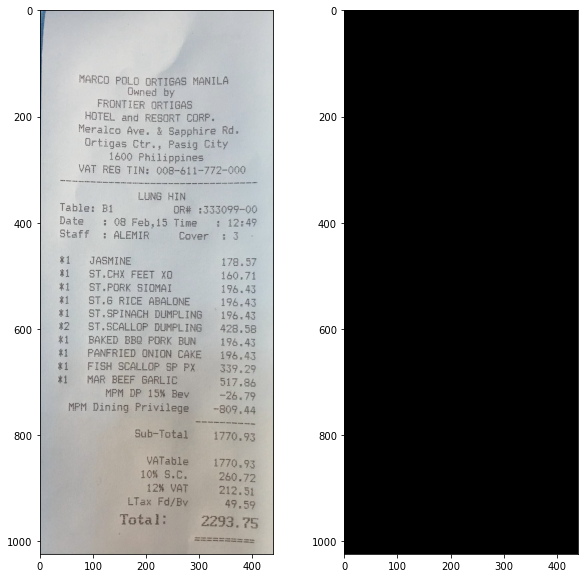

In [17]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(imgShow)
ax[1].imshow(imgMask)

In [18]:
roi = [[(136, 456), (272, 494), 'text', 'Table'],
       [(160, 488), (312, 532), 'text', 'Date'],
       [(156, 524), (318, 556), 'text', 'Staff'],
       [(406, 464), (510, 488), 'text', 'DR#'],
       [(422, 490), (546, 524), 'text', 'Time'],
       [(414, 522), (546, 556), 'text', 'Cover'],
       [(70, 568), (542, 966), 'text', 'ItemAndPrice'],                           
       [(408, 900), (532, 936), 'text', 'MPM DP 15% Dev'],                        
       [(374, 930), (536, 972), 'text', 'MPM Dining Privilege'],                  
       [(372, 990), (526, 1030), 'text', 'Sub-Total'],
       [(376, 1052), (528, 1082), 'text', 'VATable'],
       [(368, 1088), (530, 1120), 'text', '10% S.C.'],
       [(368, 1150), (530, 1186), 'text', 'LTax Fd/Bv'],
       [(354, 1186), (524, 1230), 'text', 'Total']]

In [19]:
    myData = []   # all of the image data stored here
    print(f'########## Extracting data from Image################')

    part1 = '{';
    part2 = '"Consumed items" :['
   # part3 = ''
    items = []
    prices = []
    for x,r in enumerate(roi):

        cv2.rectangle(imgMask, (r[0][0],r[0][1]), (r[1][0],r[1][1]),(0,255,0),cv2.FILLED)
        imgShow = cv2.addWeighted(imgShow,0.99,imgMask,0.1,0)


        imgCrop = imgScan[r[0][1]:r[1][1], r[0][0]:r[1][0]]


########## Extracting data from Image################


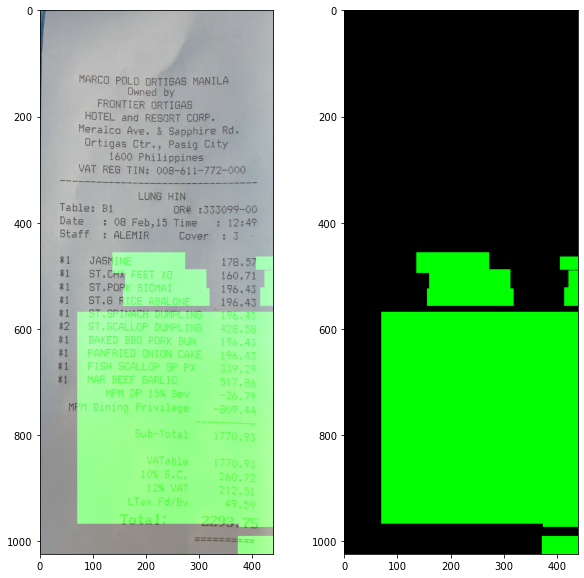

In [20]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(imgShow)
ax[1].imshow(imgMask)